In [1]:
import numpy as np
import matplotlib.pyplot as plt


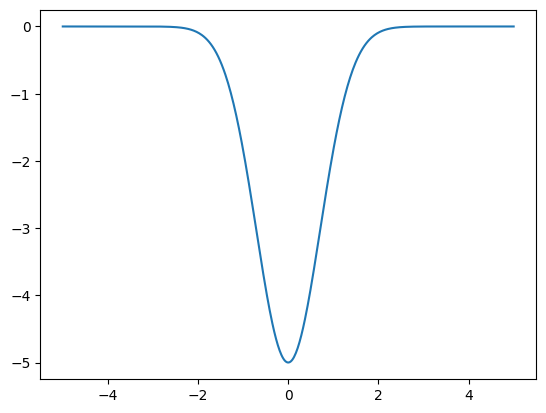

In [2]:
n = 500
h = np.zeros((n,n))
v = np.zeros(n)
CONSTANT_A = 1
V_0 = -5
x = np.zeros(n)
L = 5
x = np.linspace(-L, L, n)
def potential(x):
    return V_0*np.e**(-CONSTANT_A*x**2)

delta_x = 2*L/n
for i in range(0,n):
    v[i] = potential(x[i])

plt.plot(x,v)


In [3]:
for i in range(0,n):
    h[i][i] = 1/(delta_x**2)+v[i]
    if i != n-1:
        h[i][i+1] = -1/(2*delta_x**2)
        
    if i != 0:
        h[i][i-1] = -1/(2*delta_x**2)

ans = np.linalg.eigh(h)

In [26]:
eigen_value =ans[0]
eigen_vector = ans[1]

psi = np.transpose(eigen_vector)
psi

array([[ 1.05822622e-07,  2.11950464e-07,  3.18689625e-07, ...,
         3.18689625e-07,  2.11950464e-07,  1.05822622e-07],
       [-1.20363481e-05, -2.40848931e-05, -3.61578445e-05, ...,
         3.61578445e-05,  2.40848931e-05,  1.20363481e-05],
       [ 4.17094743e-04,  8.34192729e-04,  1.25129720e-03, ...,
         1.25129720e-03,  8.34192729e-04,  4.17094743e-04],
       ...,
       [-2.05609397e-03,  4.11026464e-03, -6.16059050e-03, ...,
         6.16059050e-03, -4.11026464e-03,  2.05609397e-03],
       [ 1.10349744e-03, -2.20672126e-03,  3.30939789e-03, ...,
         3.30939789e-03, -2.20672126e-03,  1.10349744e-03],
       [ 1.10230173e-03, -2.20433046e-03,  3.30581322e-03, ...,
        -3.30581322e-03,  2.20433046e-03, -1.10230173e-03]])

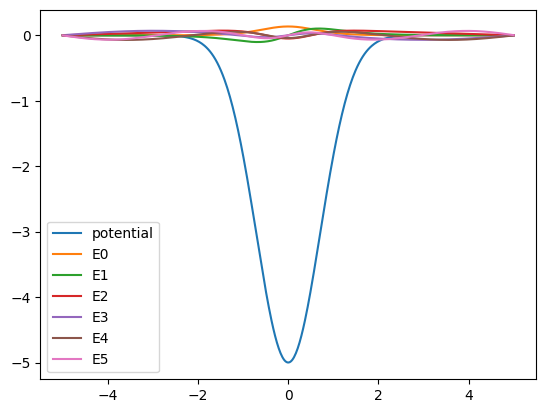

In [27]:
val_sorted = np.sort(eigen_value)
#vec_sorted = np.transpose(eigen_vector)
vec_sorted = eigen_vector
plt.plot(x,v,label="potential")
for i in range(6):
    plt.plot(x, psi[i],label=f"E{i}")
plt.legend()



In [28]:
psi_0 = psi


def evolves(psi, final_t, dt):
    t = 0
    while t< final_t:
        t+=dt
        psi_new = psi.copy()
        psi_new = psi- np.dot(h, psi)*dt
        psi=psi_new
    return psi





In [29]:
psi_t = evolves(psi_0, 10,0.1)
t_axis = np.arange(0,10,0.1)



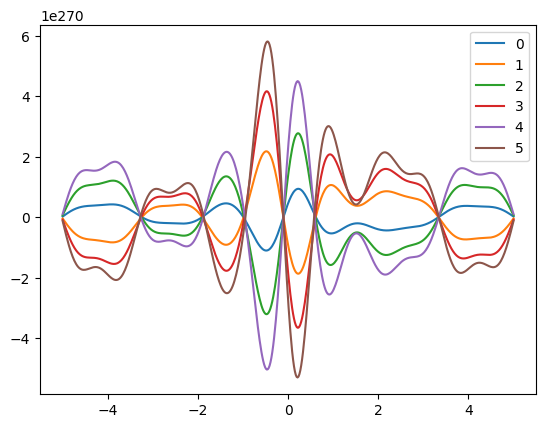

In [32]:
for i in range(6):
    plt.plot(x, psi_t[i],label=i)
    plt.legend()
    
    